In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install facenet-pytorch --no-deps
!pip install opendatasets
# Clean up the notebook
clean_notebook()


Notebook cleaned.


# Download Dataset

https://www.kaggle.com/datasets/tapakah68/selfies-and-video-dataset-4-000-people

```markdown


The dataset contains video files of 4,000 people. We have filtered the dataset to include only video files. Below is the summary of the dataframe `df`:

- **Number of entries:** 40
- **Columns:** 
    - `files`: Path to the video file
    - `type`: Type of the file (all entries are 'video')

Here is a preview of the dataframe:

|   | files   | type  |
|---|---------|-------|
| 2 | /1/3.mp4 | video |
| 3 | /1/4.mp4 | video |
| 6 | /1/7.mp4 | video |
| 7 | /1/8.mp4 | video |
| 10 | /2/3.mp4 | video |
| ... | ... | ... |
| 79 | /10/8.mp4 | video |

The dataset is ready for further analysis and processing.
```

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/tapakah68/selfies-and-video-dataset-4-000-people")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  tuchsanai


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/tapakah68/selfies-and-video-dataset-4-000-people


100%|██████████| 666M/666M [00:41<00:00, 16.7MB/s] 


In [2]:
import pandas as pd

df = pd.read_csv("./selfies-and-video-dataset-4-000-people/selfie_and_video.csv")
df = df[df['type']=='video']

df

,files,type
2,/1/3.mp4,video
3,/1/4.mp4,video
6,/1/7.mp4,video
7,/1/8.mp4,video
10,/2/3.mp4,video
11,/2/4.mp4,video
14,/2/7.mp4,video
15,/2/8.mp4,video
18,/3/3.mp4,video
19,/3/4.mp4,video


# Display video

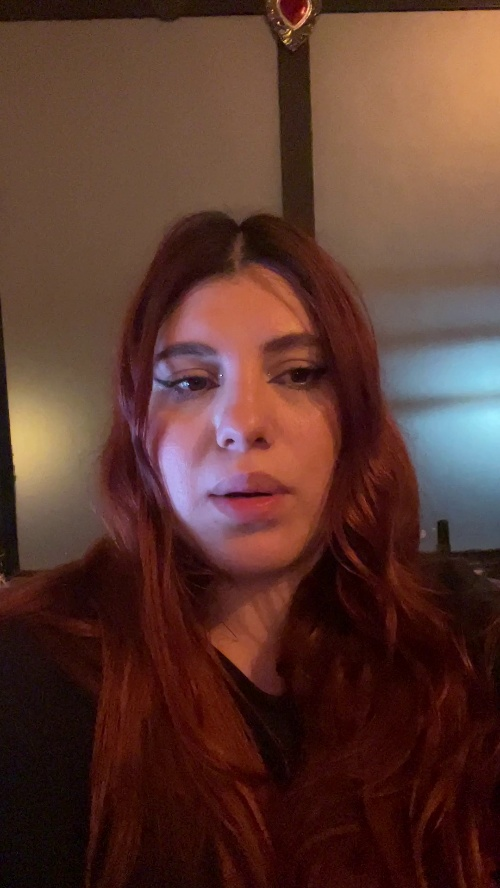

In [ ]:
import pandas as pd
import cv2
from IPython.display import display, Image, clear_output
import numpy as np

def play_video(video_path):
    """
    Play a video in a Jupyter Notebook.
    
    Args:
        video_path (str): Path to the video file.
    """
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Cannot open video file.")
        return

    try:
        while cap.isOpened():
            
            ret, frame = cap.read()

            if not ret:
                continue
                
            ratio = 500.0 / frame.shape[1]
            frame = cv2.resize(frame, (500, int(frame.shape[0] * ratio)))
     
            # Convert the frame to JPEG format for display in Jupyter
            _, buffer = cv2.imencode('.jpg', frame)
            img_bytes = buffer.tobytes()

            # Display the frame in Jupyter Notebook
            display(Image(data=img_bytes))
            clear_output(wait=True)  # Clear previous frame for smoother playback

    finally:
        cap.release()
        print("Video stream ended.")


# random selected video from df

df = pd.read_csv("./selfies-and-video-dataset-4-000-people/selfie_and_video.csv")
df = df[df['type']=='video']
video_path =f"./selfies-and-video-dataset-4-000-people/files{df.sample(1)['files'].values[0]}" 

play_video(video_path)


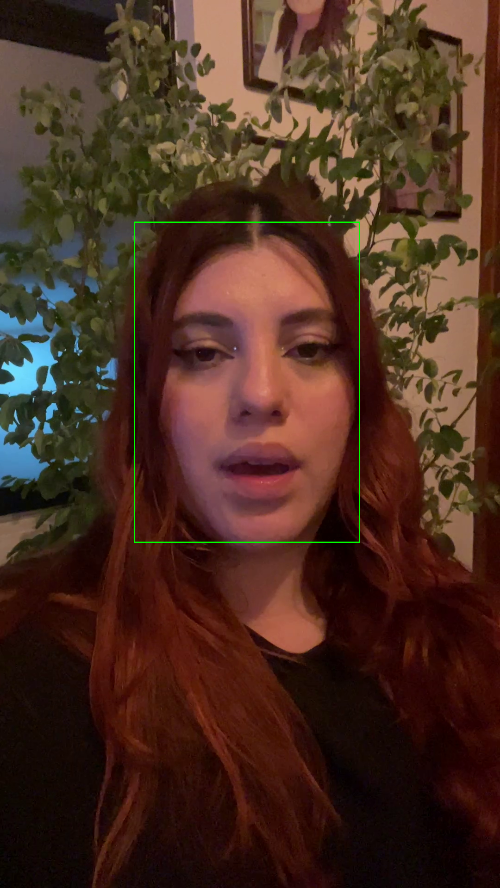

In [ ]:
import pandas as pd
import torch
from facenet_pytorch import MTCNN
import cv2
from PIL import Image
from IPython.display import display, clear_output

# Initialize the MTCNN model
mtcnn = MTCNN(keep_all=True, device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu'))

# Path to the video file


df = pd.read_csv("./selfies-and-video-dataset-4-000-people/selfie_and_video.csv")
df = df[df['type']=='video']
video_path =f"./selfies-and-video-dataset-4-000-people/files{df.sample(1)['files'].values[0]}" 

# Open the video file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"Error: Could not open video file {video_path}")
    raise RuntimeError("Video initialization failed.")

try:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
          continue

        # Convert frame to RGB for MTCNN
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Detect faces using MTCNN
        boxes, _ = mtcnn.detect(rgb_frame)

        # Draw bounding boxes on the frame
        if boxes is not None:
            for box in boxes:
                x1, y1, x2, y2 = map(int, box)
                # Draw rectangle
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Resize frame for display
        ratio = 500.0 / frame.shape[1]
        frame = cv2.resize(frame, (500, int(frame.shape[0] * ratio)))

        # Convert the frame to a PIL Image
        pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        # Display the frame
        clear_output(wait=True)
        display(pil_image)

except KeyboardInterrupt:
    print("Stopped by user.")

finally:
    # Release the video file
    cap.release()
